# Candies (ICPC Trial Problem-D 27/June/2018)


## Problem description

- Vasya eats fixed number of candies every morning (eats every candies if number of candies is smaller than the fixed number)
- Pettya eats 10% of candies every evening (round to smaller integer, 0 if number of candies is less than 10)
- Answer the minimum number that Vasya eat every morning, so that he can eat half or more of the candies

### Input

- 1 line: 
    + 1 integer: Number of Test case (N)
- N Lines:
    + 1 integer: Number of Candies
    
### Output

- 1 line:
    + 1 integer: Minimum number that Vasya eats every morning, so that he can eat half or more
    
### Sample Input

```
2
68
42
```

### Sample Output

```
3
1
```

## 1st step - Simulation

Write a function to simulate if Vasya can eat half or more.

```
    static boolean simulate(int vasya_eat, int num_candie) {

        ....
        if // vasya can eat half or more
            return true ;
        else return false ;
    }
```

In [ ]:
import sys

def simulate(eat, num_candie):
    print('Try', eat, 'per day', end = ' ', file=sys.stderr)
    half_or_more = (num_candie+1) // 2
    vasis_eat = 0

    while(num_candie > 0):
        v_eat = min(eat, num_candie)
        vasis_eat += v_eat
        num_candie -= v_eat
        p_eat = (num_candie // 10)
        num_candie -= p_eat
        print(v_eat, ':', p_eat, sep='', end=' ', file=sys.stderr)

    if vasis_eat >= half_or_more:
        print('OK:', vasis_eat, file=sys.stderr)
        return True
    else:
        print('NG:', vasis_eat, file=sys.stderr)
        return False

In [ ]:
# Lets's simulate
# if There are 43 candies and Vasis eats 1 per day

simulate(1, 43)

### Java sample code

```
    static boolean simulate(int vasya_eat, int num_candie) {

        int half = (num_candie+1) / 2 ;
        int v_total = 0 ;
        int p_total = 0 ;

        while (num_candie > 0) {
            int v_eat = Math.min(vasya_eat, num_candie) ;
            v_total += v_eat ;
            num_candie -= v_eat ;

            int p_eat = num_candie / 10 ;
            p_total += p_eat ;
            num_candie -= p_eat ;
        }

        // System.err.println(vasya_eat+" "+v_total+" "+p_total) ;
        if (v_total >= half) return true ;
        else return false ;
    }
```

## 2nd step: Finding minimum number

Now we can find the minimum number by incrementing vasis_eat from 1 until simulation() returns True.

**BUT** ... it is not enough. If the number of candies is a big number, following algorithm is too slow.

In [ ]:
NUM_CANDIE = 2000000

for v_eat in range(1, NUM_CANDIE+1): # From 1 to NUM_CANDIE
    if simulate(v_eat, NUM_CANDIE): # If True is returned, it's the answer
        print('Mimimum Number is', v_eat)
        break

## 3rd step: Binary search (Bisection search)

It is clear that

- If Vasya eats 0 per day, he can not eat Half-or-More (lower boundary)
- If Vasya eats every candies at 1st day, he eats Half-or-More (upper boundary)
- The more Vasya eats every day, the more (or same) he eats totally (corelation)

It is necceary for Binary Search that lower and upper boundary is identified, and the data in the range is sorted.

We can apply Binary search here.

1. Simulate the middle(M) of lower and upper boundary $M=LowerBoundary+UpperBoundary/2$
1. If simulation returns True, set the upper boundary to M, else set the lower boundary to M
1. Repeat above steps until $UpperBoundary = LowerBoundary + 1$
1. upper boundary is the minimum number

In [ ]:
NUM_CANDIE = 2000000

max_ng = 0  # Lower boundary
min_ok = NUM_CANDIE # Upper boundary

num_try = 0

while min_ok != max_ng + 1:
    num_try += 1
    v_eat = (max_ng + min_ok) // 2  # Middle
    if simulate(v_eat, NUM_CANDIE):  # Vasys can eat half or more with v_eat
        min_ok = v_eat
    else:
        max_ng = v_eat
        
print('Minimum Nummber is:', min_ok)
print('Number of simulation:', num_try, file=sys.stderr)

### Java sample code of Candie

```
import java.util.Scanner;

class Candie {

    static boolean simulate(int vasya_eat, int num_candie) {

        int half = (num_candie+1) / 2 ;
        int v_total = 0 ;
        int p_total = 0 ;

        while (num_candie > 0) {
            int v_eat = Math.min(vasya_eat, num_candie) ;
            v_total += v_eat ;
            num_candie -= v_eat ;

            int p_eat = num_candie / 10 ;
            p_total += p_eat ;
            num_candie -= p_eat ;
        }

        // System.err.println(vasya_eat+" "+v_total+" "+p_total) ;
        if (v_total >= half) return true ;
        else return false ;
    }

    public static void main(String argv[]) {
        Scanner sc = new Scanner(System.in) ;
        int num_tc = sc.nextInt() ;

        for (int i=0; i<num_tc; i++) {
            int candies = sc.nextInt() ;
            int max_ng = 0 ;
            int min_ok = candies ;

            while (min_ok != max_ng + 1) {
                int middle = (max_ng+min_ok) / 2 ; // Sometimes need to care integer overflow
                if (simulate(middle, candies)) min_ok = middle ;
                else max_ng = middle ;
            }
            System.out.println(min_ok) ;
        }
    }
}
```

### Pruning (Performance tuning)

Please think how to improve the execution speed of above code.

## Typical usage of Binary Search

Many programming languages support *Binary Search* in its library. In case of Java, Java.util.Arrays.binarySearch() and Java.util.Collections.binarySearch() are implemented. The behavior of binarySearch() is as follows

- returns 0 or positive integer, if element is found
- returns negative integer (-(insertion index)-1) if element is not found. insertion index can be calculated by bit negation (~ tilda).

### Sample usage

```
import java.util.Arrays ;

class Bsearch {
    public static void main(String argv[]) {
        int[] x = {1, 3, 5, 8};
        
        for (int key = 0; key < 10; key++) {
            int location = Arrays.binarySearch(x, key);
            if (location >=0) {
                System.out.println("key " + key + " found at " + location);
            }
            else {
                System.out.println("key " + key + " not found. insertion point:" + ~location);
            }

        }
    }
}
```

#### Result of above program

```
key 0 not found. insertion point:0
key 1 found at 0
key 2 not found. insertion point:1
key 3 found at 1
key 4 not found. insertion point:2
key 5 found at 2
key 6 not found. insertion point:3
key 7 not found. insertion point:3
key 8 found at 3
key 9 not found. insertion point:4
```

## Another sample of Binary Search

MCPC 2017, problem-G Concrete Pathway around Pool

This problem can be solved using quadratic formula. $ax^2+b2+c=0 \rightarrow x=\frac{-b\pm \sqrt{b^{2}-4ac}}{2a}$ , but it's possible to solve using binary search as well.

### Problem description

Your company is going to build concrete pathway around the swimming pool. The prototype of the pool is shown in figure. The length and width of the pool are *L ft* and *W ft*, and the area of the pathway(cyan color) is *A* $ft^2$.

The problem is to determine what will be the width X(in *ft*) of the pathway should be after the length, width and the area are already defined.

### Input

- 1 line: 
    + 1 integer: Number of Test case (N)
- 2N Lines:
    + 2 float: Length and Width of the Pool
    + 1 float: Area of the Pathway
    
### Output

- 1 line:
    + 1 float: Width of the Pathway (error range $\pm 10^{-2}$)
    
### Sample Input

```
2
18 9
124
36 18
393.25
```

### Sample Output

```
2.00
3.25
```

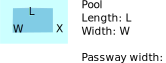

In [7]:
from IPython.display import SVG
SVG("pool.svg")

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

'''
    2017 MCPC at UCSY
    Problem-G: Concrete Pathway around Pool (Binary Search version)
'''
import sys


class TestCase():
    pass


def parse_tc(tc):
    '''
        Input: Test Case
        Update: 
        Return: None
    '''

    tc.l, tc.w = map(float,sys.stdin.readline().split())
    tc.a = float(sys.stdin.readline().strip())

    return


def search_lowhigh(tc, low, high):
    low_area = (tc.w + low*2) * (tc.l + low*2) - (tc.w * tc.l)
    high_area = (tc.w + high*2) * (tc.l + high*2) - (tc.w * tc.l)
    if low_area <= tc.a and high_area >= tc.a:
        return low, high
    elif high_area < tc.a:
        return search_lowhigh(tc, high, high*2)
    else:
        raise 'Logic error'


def bsearch(tc, low, high):
    mid = (low+high) / 2
    area = (tc.w + mid*2) * (tc.l + mid*2) - (tc.w * tc.l)

    if area < tc.a:
        if high-mid <= 0.001:
            return (high+mid) / 2
        else:
            return bsearch(tc, mid, high)
    else:
        if mid-low <= 0.001:
            return (mid+low) / 2
        else:
            return bsearch(tc, low, mid)

def solve(tc):
    '''
        Input: Test Case
        Return: None
    '''

    parse_tc(tc)
    
    low, high = search_lowhigh(tc, 0, 1)

    x = bsearch(tc, low, high)
    
    print(round(x,2))
    return


##
##  Main routine
##
if __name__ == '__main__':
    
    tc = TestCase()
    tc.t = int(sys.stdin.readline())
    
    for i in range(tc.t):
        solve(tc)
